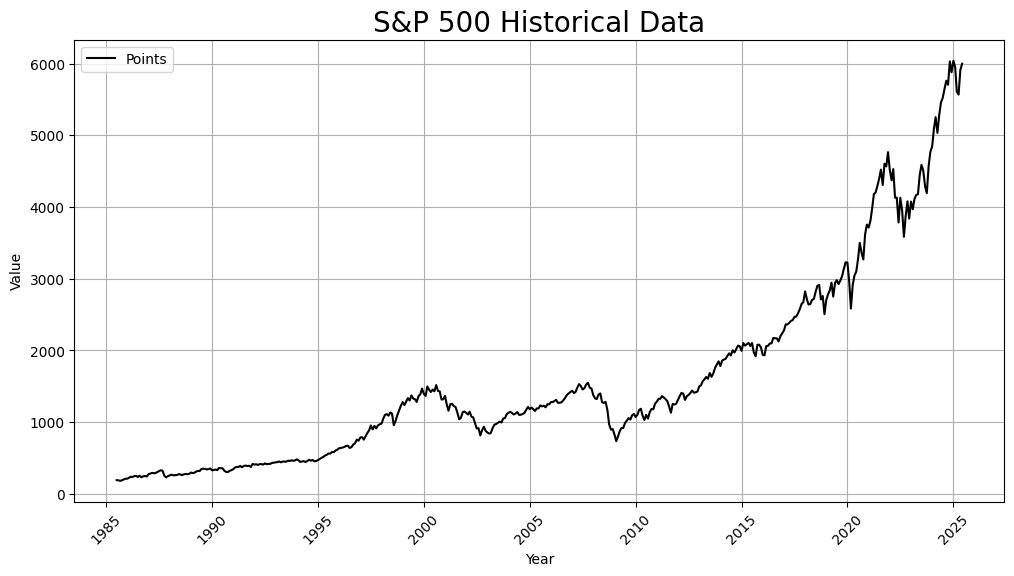

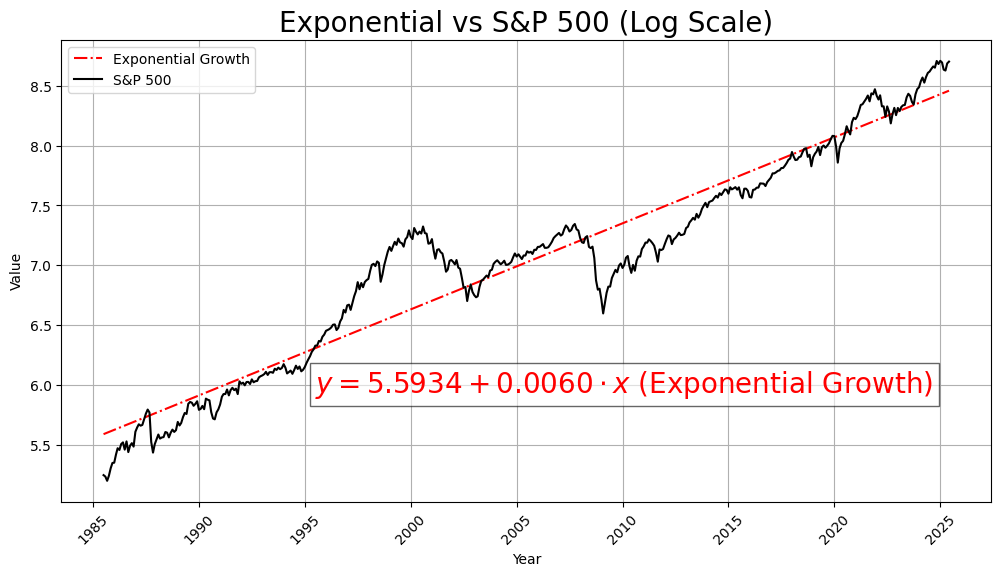

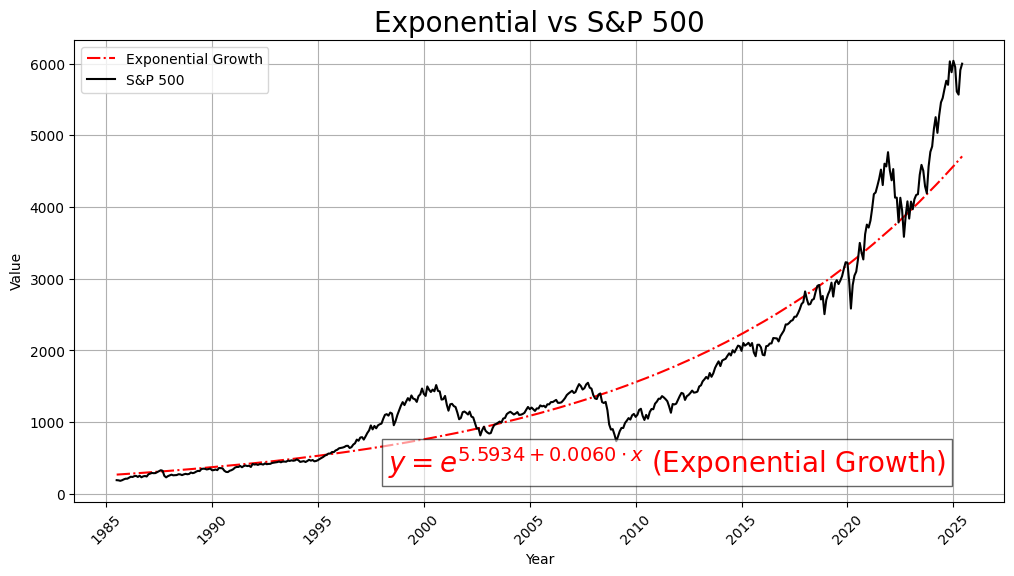

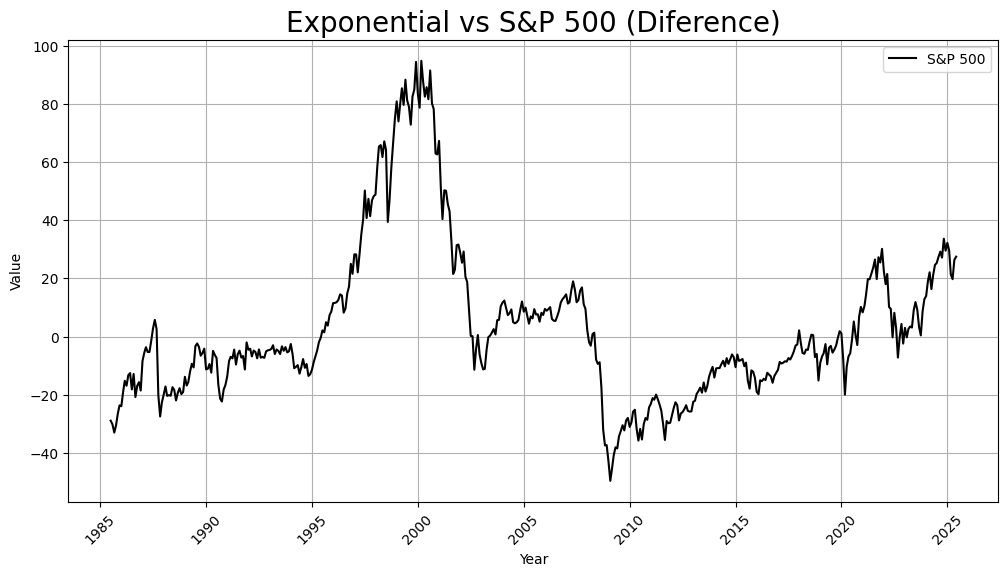

In [ ]:
# %%

import sys
import os

# Caminho absoluto para o diretório onde está 'aux_functions'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "Data_Analysis")))

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from aux_functions.plotter import plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10
from aux_functions.helper import future_brownian

#from aux_functions.helpers import future_brownian
####################################
# Objetivo: Regressão linear SP500 #
####################################
Monthly_investment = 500
Year = 2025
simulacoes = 10000
Future_Years = 20


# Função para obter os dados históricos do S&P 500
def get_data(symbol='^GSPC', period='80y', interval='1mo'):
    data = yf.download(tickers=symbol, period=period, interval=interval)
    data.to_pickle("/home/pedro-maltez-ubuntu/Documents/PIC1---Stock-Market-Forecasting-and-Alignment/Data_Analysis/S&P500_Data/S&P500.pkl")
    data = data[['Close']].reset_index()
    return data

try:
    # Carregar de volta (sem perda de tipo)
    sp500_data = pd.read_pickle("/home/pedro-maltez-ubuntu/Documents/PIC1---Stock-Market-Forecasting-and-Alignment/Data_Analysis/S&P500_Data/S&P500.pkl")
    name = 'S&P 500'
except:
    # Obter dados históricos do S&P 500
    name, periodo, intervalo = '^GSPC', '40y', '1mo'
    sp500_data = get_data(name, periodo, intervalo)
    name = yf.Ticker(name).info['longName']

sp500_data = sp500_data[['Close']].reset_index()
sp500_data = sp500_data[(sp500_data['Date'] <= f'{Year}-12-31')]

# Criar um vetor de anos com base no número de dados
unit_of_time = np.arange(len(sp500_data))

# Criar log do sp500
log_sp500 = np.log(sp500_data['Close'])


# Regressão linear simples
x = unit_of_time
y_log = log_sp500
y = np.array(sp500_data['Close'])
y = y.flatten()

# Garantir que ambos são arrays numpy para evitar erros de broadcasting
x = np.array(x)
y_log = np.array(y_log)

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)
y_mean_log = np.mean(y_log)

# Example of NumPy's polyfit
coef_log = np.polyfit(x, y_log, 1)
y_pred_log = np.polyval(coef_log, x)
coef_log = coef_log.flatten()
y_pred = np.exp(y_pred_log)

# SP500 - exponential (relative)
diference = 100 * (y - y_pred)/y_pred

# Função que facilita o plot 
def improve_draw():
    # Melhorando visualmente
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# Plotando os gráficos
plot1(sp500_data['Date'], sp500_data['Close'], name)
plot2(sp500_data['Date'], y_pred_log, log_sp500, name, coef_log[1], coef_log[0])
plot3(sp500_data['Date'], y_pred, y, name, coef_log[1], coef_log[0])
plot4(sp500_data['Date'], diference, name)


# Calcular rendimento médio do sp500, apenas funciona com períodos em meses
y1 = y_pred[-11]
y2 = y_pred[-23]
percent = 100 * (y1 - y2) / y2

In [ ]:
# %%

print(f"Preço teste: {y1}")
print(f"Preço teste 12 meses atrás: {y2}")
print(f"Rendimento médio do {name}: {percent}%")

# A inclinação B1 representa o crescimento logarítmico por "unidade de tempo"
# Como estás a usar intervalos mensais:
growth_rate = np.exp(coef_log[0]) - 1
cagr = (1 + growth_rate)**12 - 1  # anualizado

Preço teste: 4434.971775500168
Preço teste 12 meses atrás: 4127.948708138691
Rendimento médio do S&P 500: 7.4376667218793%


In [ ]:
# %%

print(f"Crescimento médio mensal: {growth_rate * 100:.2f}%")
print(f"Crescimento médio anual (CAGR): {cagr * 100:.2f}%")

Crescimento médio mensal: 0.60%
Crescimento médio anual (CAGR): 7.44%


In [ ]:
# %%

# MÉTODO TESTE
total_invest = Monthly_investment * (np.arange(len(y)) + 1)

sp500_price = y / 10

stocks_owned = np.cumsum(Monthly_investment / sp500_price)

porfolio = stocks_owned * sp500_price # Calcular evolução portfolio

In [ ]:
# %%

# Método de weighted buy
allocation = (Monthly_investment * (1 - 2.5 * diference/100)) # dinheiro investido mês a mês
total_allocation = np.zeros(len(allocation))
allocation = np.clip(allocation, Monthly_investment * 0.5, Monthly_investment * 1.5)
total_allocation = np.cumsum(allocation)


stocks_owned2 = allocation / sp500_price

stocks_owned2 = np.cumsum(allocation / sp500_price)

porfolio2 = stocks_owned2 * sp500_price

In [ ]:
# %%

print(f"Totalidade de dinheiro alocado em Standart Investment: {total_invest[-1]}.")
print(f"Totalidade de carteira de investimento em Standart Investment: {porfolio[-1]}.")
print(f"Totalidade de dinheiro alocado: {total_allocation[-1]}.")
print(f"Totalidade de carteira de investimento: {porfolio2[-1]}.")

Totalidade de dinheiro alocado em Standart Investment: 240000.
Totalidade de carteira de investimento em Standart Investment: 1845803.8749738927.
Totalidade de dinheiro alocado: 246506.85113078204.
Totalidade de carteira de investimento: 2127257.767818578.


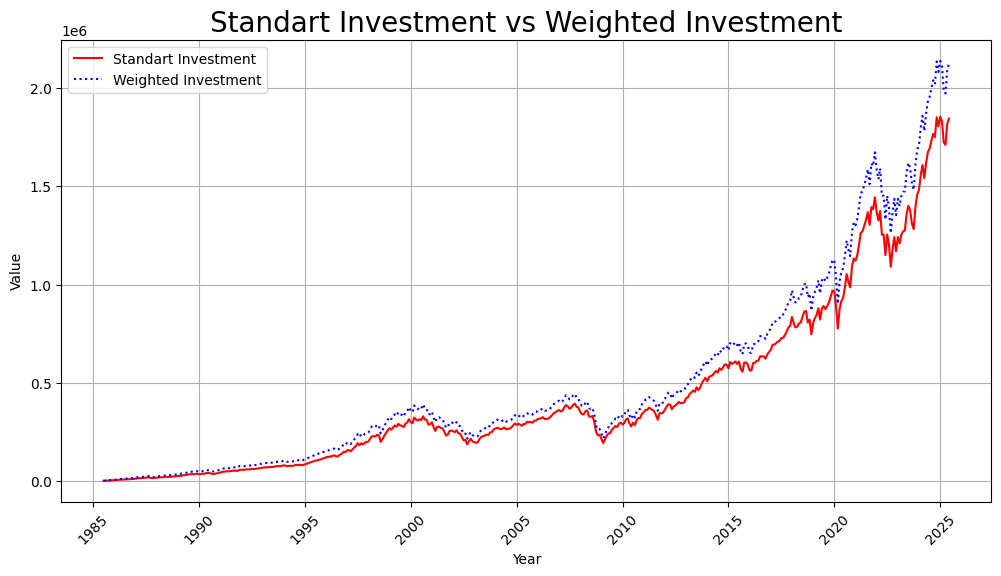

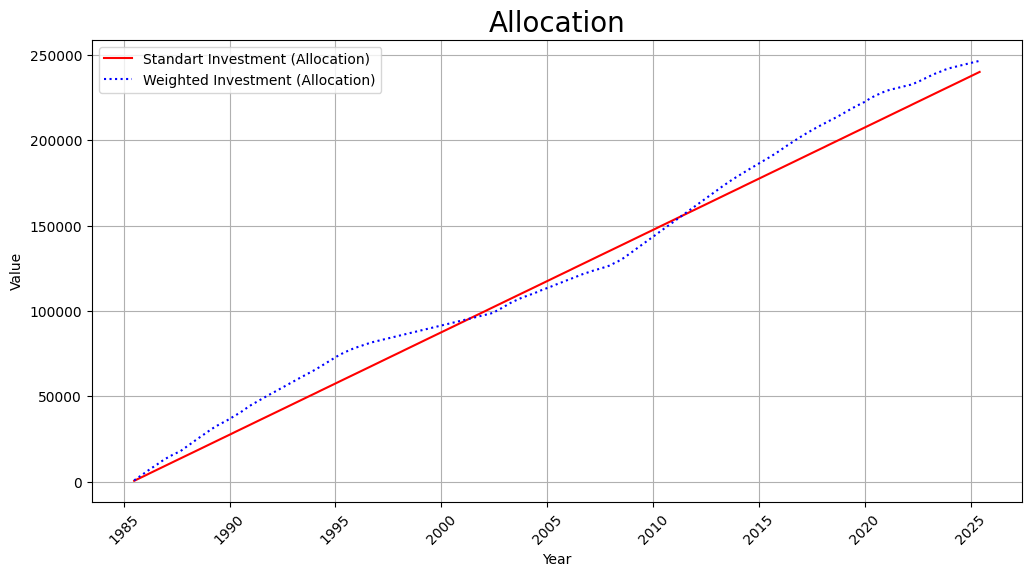

In [ ]:
# %%

plot5(sp500_data['Date'], porfolio, porfolio2)
plot6(sp500_data['Date'], total_invest, total_allocation)

In [ ]:
# %%

# Ver se a função Diference tem média 0 num espaço grande de tempo
print(f"Média do gráfico diference: {np.mean(diference)}%")

Média do gráfico diference: 3.0781311215766705%


In [ ]:
# %%

year = Year
# Vamos fazer com dados até x estudar 
sp500_data_since_a_year = sp500_data[(sp500_data['Date'] <= '2025-12-31') & (sp500_data['Date'] >= f'{year}-01-01')]
days_year = len(sp500_data_since_a_year)
sp500_data_since_a_year['Close'].values[0][0]

# Obter as datas reais
datas = sp500_data_since_a_year['Date'].reset_index(drop=True)
time = len(datas)

In [ ]:
# %%

# Parâmetros
preco_inicial = sp500_data_since_a_year['Close'].values[0]

# Retornos logarítmicos mensais
log_returns = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1)).dropna()

# Desvio padrão mensal
sigma = log_returns.std()
mu = np.log(1 + cagr) / 12
mu = log_returns.mean().iloc[0]

In [ ]:
# %% 

# Matriz de preços
precos = np.zeros((time, simulacoes))
precos[0] = preco_inicial

/home/pedro-maltez-ubuntu/Documents/PIC1---Stock-Market-Forecasting-and-Alignment/Data_Analysis/aux_functions/helper.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(stock_data['Close'].iloc[-1])


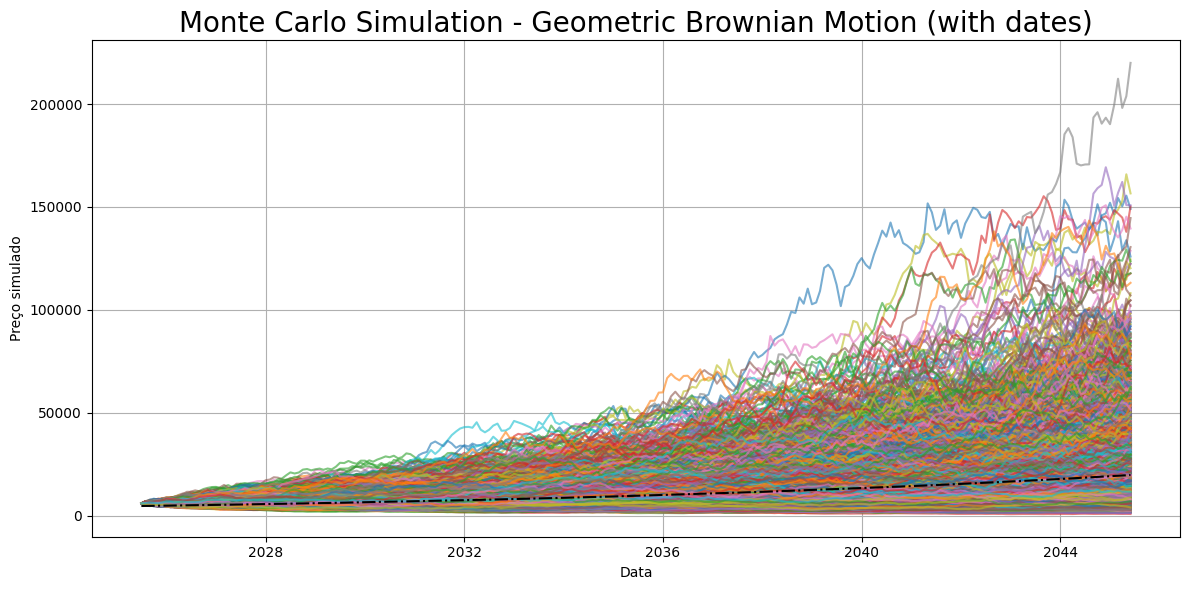

In [ ]:
# %%

########################################################################
################# FORMA EFICIENTE CHATGPT ##############################
########################################################################

# Log returns
log_returns = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1)).dropna()

# Se for DataFrame por engano:
if isinstance(log_returns, pd.DataFrame):
    log_returns = log_returns.iloc[:, 0]  # pega a coluna certa

# Corrigir sigma para tipo float
sigma = float(log_returns.std()) 

#############################################################
# 17/05/2025
# Número de meses futuros a prever
meses_futuros = Future_Years * 12

# Estender o vetor x para o futuro
x_future = np.arange(len(sp500_data), len(sp500_data) + meses_futuros)

# Prever o log do S&P 500 com base nos coeficientes
y_pred_log_future = np.polyval(coef_log, x_future)

# Aplicar exponencial para converter de log-voltar para escala original
y_pred_future = np.exp(y_pred_log_future)

precos_df, future_dates = future_brownian(sigma, y_pred_future, sp500_data, Future_Years) # precos_df

plot7(precos_df, future_dates, y_pred_future)

##########################################################

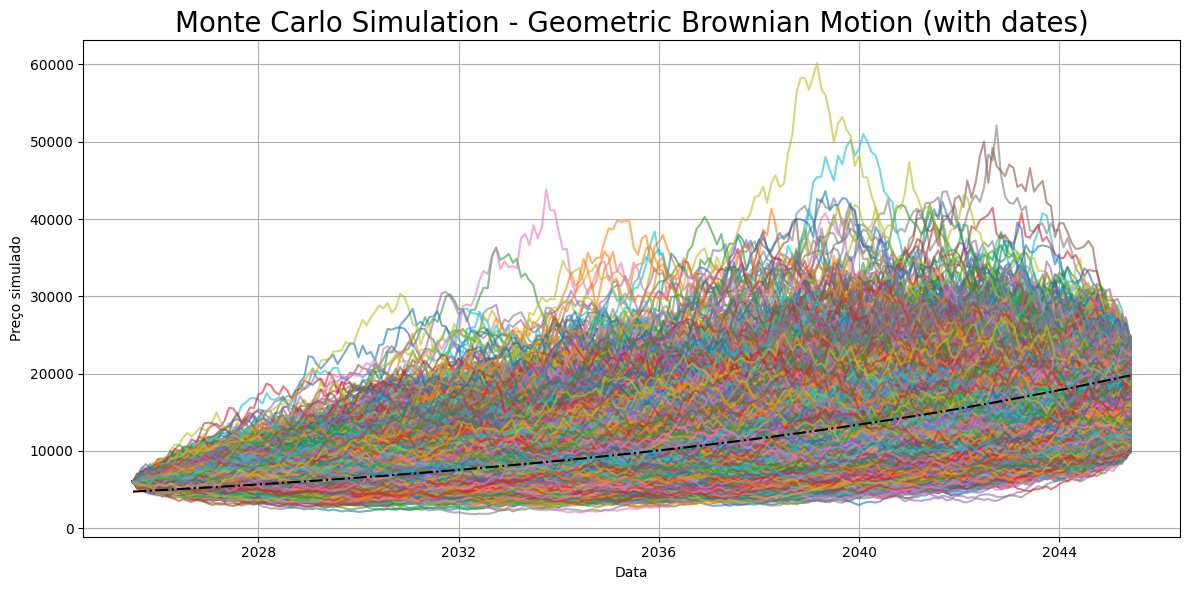

,0,1,3,4,5,7,8,9,12,13,...,9983,9984,9985,9986,9989,9990,9991,9994,9997,9999
2025-07-01,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,...,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863,6000.359863
2025-08-01,5908.841963,6031.808431,6115.311575,5901.647318,5698.953245,5837.490425,5782.653527,5974.748398,6076.484621,6194.735873,...,6266.789648,5824.808213,6072.400617,5748.711684,5790.898416,5168.383040,5849.567309,6253.420886,5533.265917,6204.894554
2025-09-01,6243.948930,6149.381591,6194.117296,5767.461654,5713.409344,6140.082086,5761.610019,6262.728664,6181.265852,6161.014895,...,6055.338830,6253.108894,5991.840764,5264.002321,6437.156896,5160.776229,5610.089781,6625.121871,5596.009689,6454.694802
2025-10-01,6390.336394,6637.043765,6158.886233,5420.471050,5280.310934,6083.274147,5624.854046,6438.713684,6368.344057,6210.118353,...,5677.511314,6606.106031,5863.090559,5490.863524,7436.419347,5310.981046,5637.512040,6470.172719,5446.734208,6223.354811
2025-11-01,6442.642696,7011.118582,5673.673843,5396.221419,5541.822605,6329.975495,5884.456015,6482.381226,6536.398327,5679.412080,...,5490.719333,6642.084249,5624.534240,5024.134821,7443.661122,5168.550044,5594.899094,6507.058963,5341.071533,6100.533135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045-02-01,12592.518909,22917.981255,10095.867041,22344.708471,15726.986823,22774.504846,11166.139946,14170.441130,17667.168840,9727.117783,...,15952.919113,12780.442629,14067.132772,19039.173143,15398.720894,14272.564233,12626.962253,21482.046124,21474.017146,11761.958222
2045-03-01,12913.284731,24217.501201,10799.794025,22338.728763,16358.251191,23921.627271,11348.457896,14312.404718,18818.673857,10668.326214,...,16344.201701,12484.133704,13523.864741,19377.726634,16470.661974,14590.185364,11569.957669,21325.169973,20098.590323,12193.547813
2045-04-01,12700.251495,23706.843472,10407.860342,21897.021649,15077.536183,23692.837140,11443.049829,14756.764479,20697.835709,10219.746011,...,17091.443210,11601.503591,12863.741145,19490.828356,16077.320877,15053.565149,12164.975561,21288.991477,19459.106951,11766.455199
2045-05-01,12026.609057,24749.406080,10525.711216,20720.872721,16180.777839,23843.018849,11723.837520,13934.420257,20476.725140,10455.744034,...,16533.129077,11127.014863,12496.180834,18274.351029,14122.564382,16641.990633,12519.729773,20193.291977,19034.676393,11753.995498


In [ ]:
# %% método para usar apenas do percentil 10 a 90 dos resultados.

# Obter os preços finais de cada simulação (última linha de cada coluna)
final_prices = precos_df.iloc[-1, :]

# Calcular os percentis 25 e 75 dos preços finais
perc = 25
percentil_25 = np.percentile(final_prices, perc)
percentil_75 = np.percentile(final_prices, 100 - perc)

# Filtrar as simulações que estão entre os percentis 25 e 75
filtered_precos_df = precos_df.loc[:, (final_prices >= percentil_25) & (final_prices <= percentil_75)]

filtered_precos_df


plot7(filtered_precos_df, future_dates, y_pred_future)

dataframes = [precos_df, filtered_precos_df]
filtered_precos_df

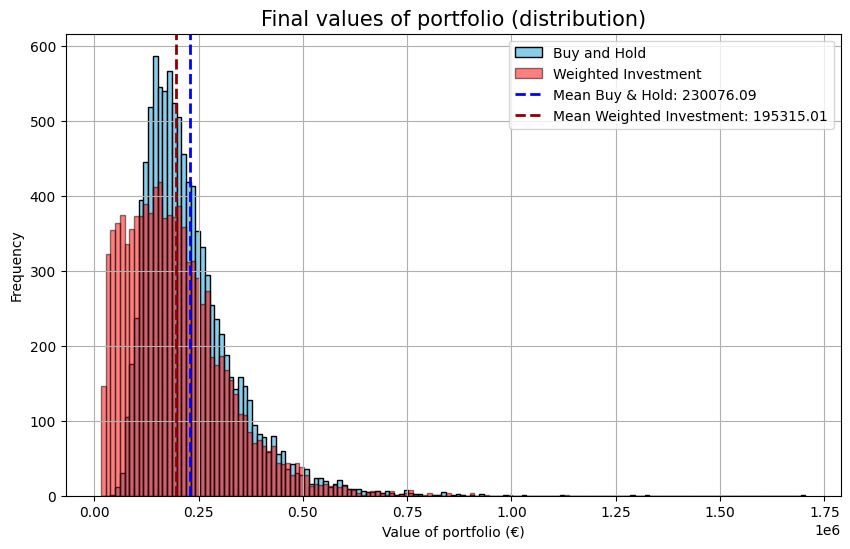

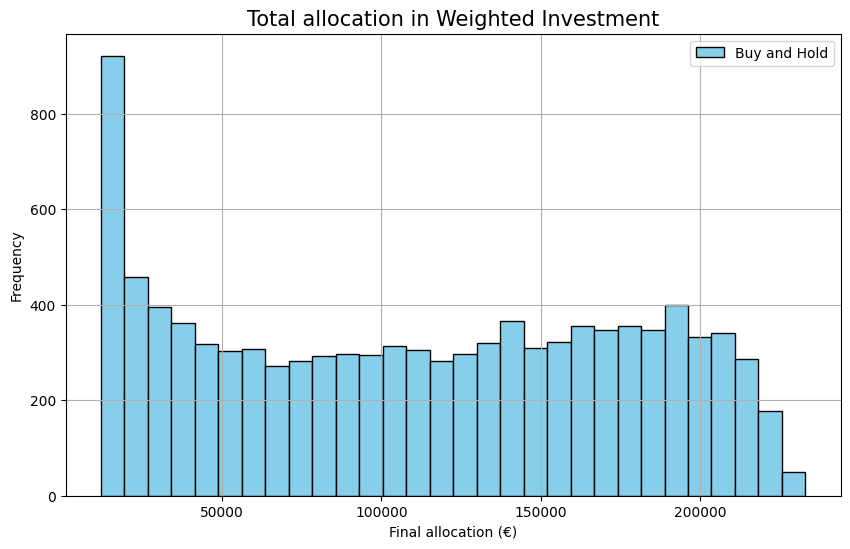

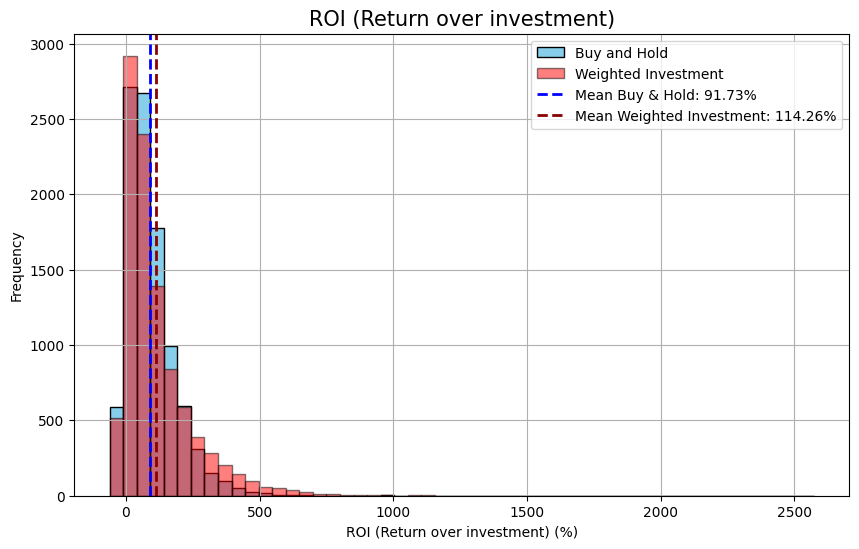

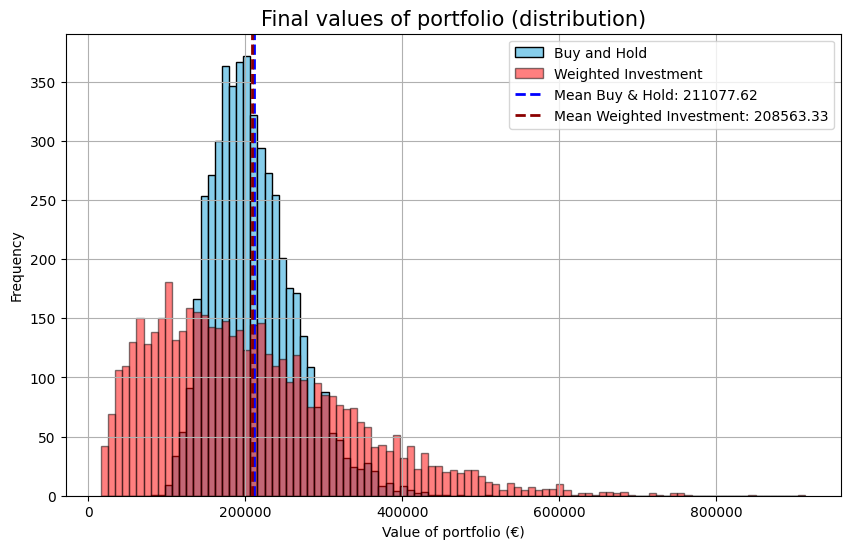

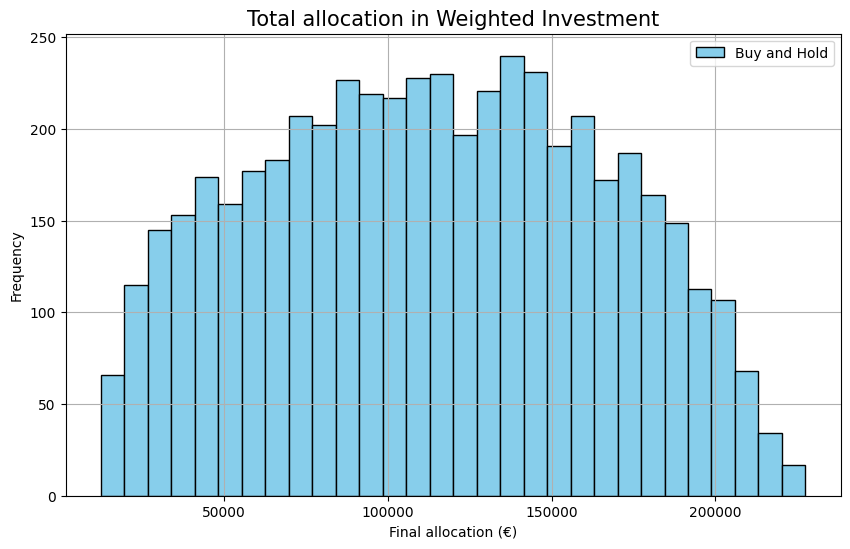

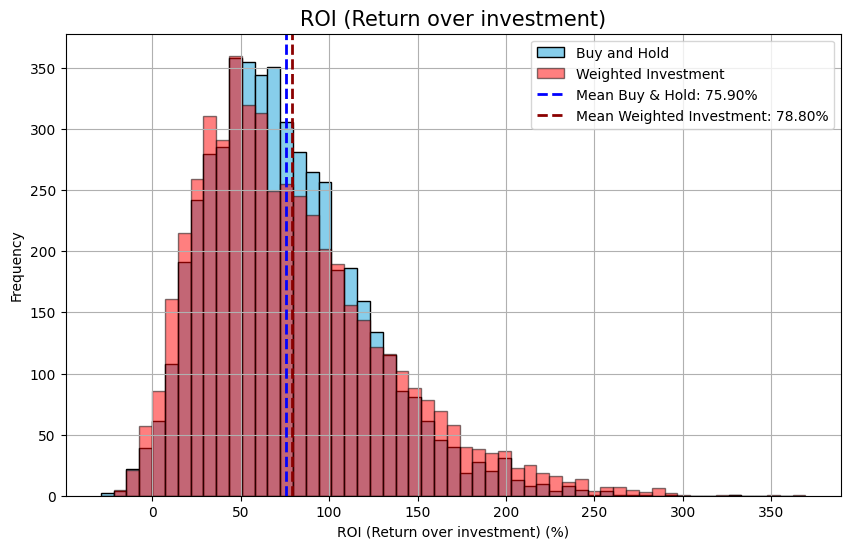

In [ ]:
# %%

# MÉTODO TESTE
for dt in dataframes:
    total_invest = np.zeros(len(dt))
    total_invest[0] = Monthly_investment
    for i in range(1, len(total_invest)):
        total_invest[i] = total_invest[i-1] + Monthly_investment

    sp500_price_monte = dt / 10

    ######################## Chat GPT
    # Inicializar o array para guardar a evolução de ações compradas por simulação
    stocks_owned_matrix = np.zeros_like(sp500_price_monte)

    # Iterar por cada simulação (coluna)
    stocks_owned_matrix = np.cumsum(Monthly_investment / sp500_price_monte.values, axis=0)

    #######################
    pd.DataFrame(stocks_owned_matrix)
    porfolio = stocks_owned_matrix * sp500_price_monte # Calcular evolução portfolio
    pd.DataFrame(porfolio)

    diference = 100 * (dt - y_pred_future[:, np.newaxis]) / y_pred_future[:, np.newaxis] # Em percentagem


    # Método de weighted buy
    allocation = (Monthly_investment * (1 - 2.5 * diference/100)) # dinheiro investido mês a 

    allocation = np.clip(allocation, Monthly_investment * 0.1, Monthly_investment * 2)
    total_allocation = np.cumsum(allocation, axis=0)

    pd.DataFrame(allocation)
    pd.DataFrame(total_allocation) 

    stocks_owned2 = allocation / sp500_price_monte

    stocks_owned2 = np.cumsum(stocks_owned2, axis=0)

    porfolio2 = stocks_owned2 * sp500_price_monte

    # Supondo que 'porfolio2' é o teu DataFrame com datas como índice e simulações nas colunas
    final_values2 = porfolio2.iloc[-1]  # pega os valores da última data
    final_values1 = porfolio.iloc[-1]

    plot8(final_values1, final_values2)


    final_allocation = total_allocation.iloc[-1, :]  # última linha (últimos valores de cada simulação)

    plot9(total_allocation, final_allocation)

    final_values2_0 = np.array(final_values2)

    roi_maltez = 100*(final_values2 - final_allocation)/final_allocation

    monthly_investment_array = np.ones(len(final_values1)) * Monthly_investment

    roi_standart = 100*(final_values1 - total_invest[-1])/total_invest[-1]

    # Define a largura dos bins
    bin_width = roi_maltez.max()/50

    # Define os limites globais
    min_val = min(roi_standart.min(), roi_maltez.min())
    max_val = max(roi_standart.max(), roi_maltez.max())

    # Gera os bins com mesma largura
    bins = np.arange(np.floor(min_val), np.ceil(max_val) + bin_width, bin_width)

    plot10(roi_standart, roi_maltez, bins)

In [ ]:
# %%

#############################################